In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset = pd.read_csv("forestfires.csv")
dataset.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
print("Nombre de lignes :", dataset.shape[0])
print("Nombre de colonnes :", dataset.shape[1])

Nombre de lignes : 517
Nombre de colonnes : 13


In [4]:
dataset.info()
#pas de valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
# resume statiqtique de variable numerique
dataset.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
# resume statiqtique de variable variable catégorielle
dataset.describe(include='object')

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


In [7]:
dataset["fire"] = [1 if x > 0 else 0 for x in dataset.area.to_list()]

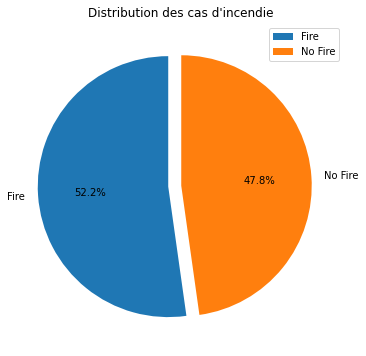

In [8]:
plt.figure(figsize=(6, 6))
plt.pie(dataset.fire.value_counts(),labels = ["Fire", "No Fire"], autopct='%1.1f%%', startangle=90, explode = [0.1,0])
plt.legend()
plt.title('Distribution des cas d\'incendie')
plt.show() 

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Days'),
 Text(0.5, 1.0, 'Countplot for the days in the week')]

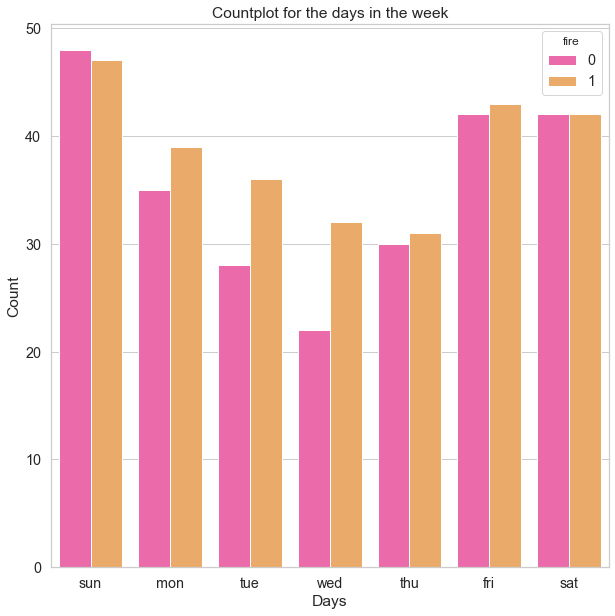

In [9]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set(style = 'whitegrid', font_scale = 1.3)
day = sns.countplot(dataset['day'], order = ['sun' ,'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], palette = 'spring',hue =dataset["fire"] )
day.set(title = 'Countplot for the days in the week', xlabel = 'Days', ylabel = 'Count')
#une repartition plutot bien equilibre au niveau des incendie par jours 

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Days'),
 Text(0.5, 1.0, 'Countplot for the days in the week')]

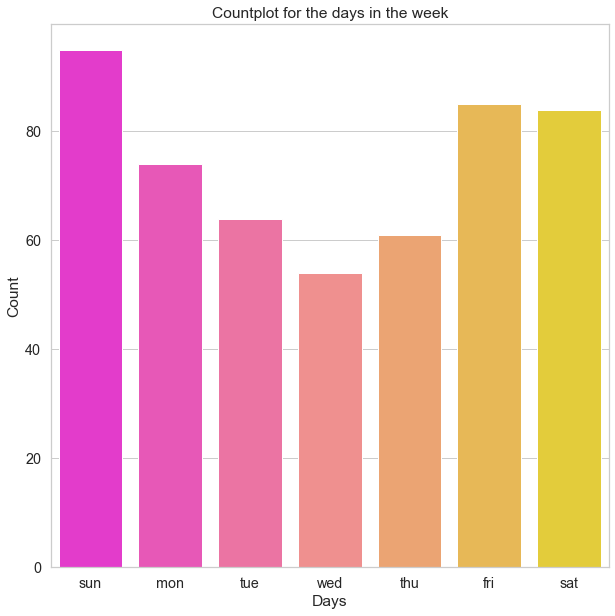

In [10]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set(style = 'whitegrid', font_scale = 1.3)
day = sns.countplot(dataset['day'], order = ['sun' ,'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], palette = 'spring')
day.set(title = 'Countplot for the days in the week', xlabel = 'Days', ylabel = 'Count')

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'months'),
 Text(0.5, 1.0, 'repartition des incendie par ')]

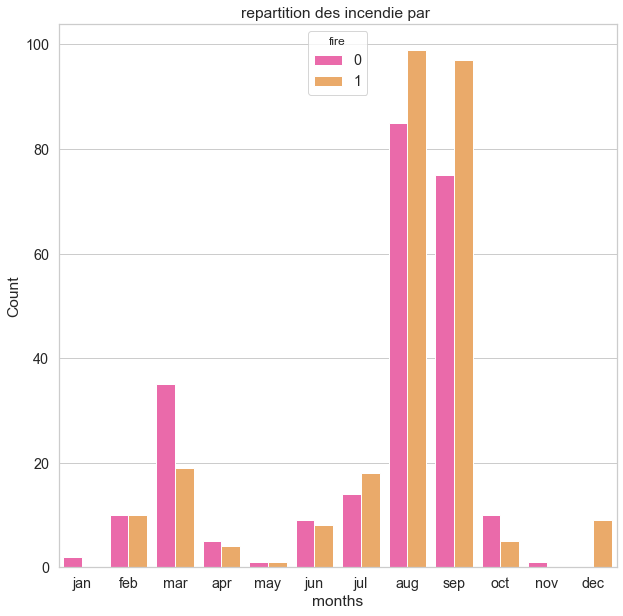

In [11]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set(style = 'whitegrid', font_scale = 1.3)
day = sns.countplot(dataset['month'], order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], palette = 'spring',hue =dataset["fire"] )
day.set(title = 'repartition des incendie par ', xlabel = 'months', ylabel = 'Count')
#il y une disparité au niveau de la repartition par mois

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'months'),
 Text(0.5, 1.0, 'repartition des incendie par ')]

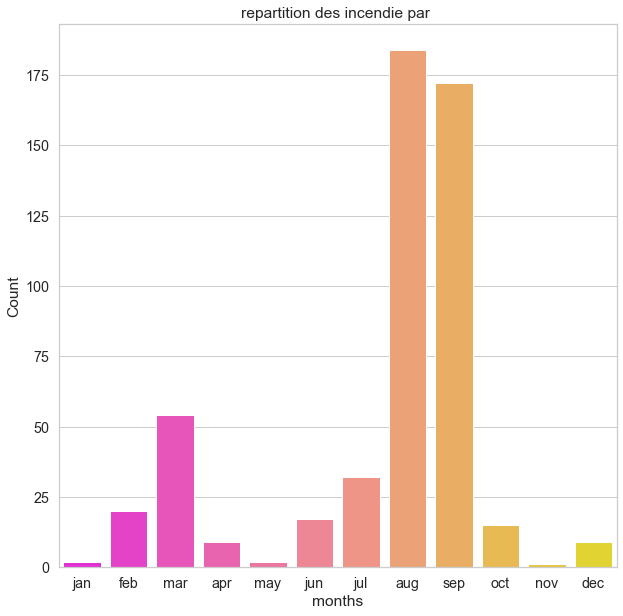

In [12]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set(style = 'whitegrid', font_scale = 1.3)
day = sns.countplot(dataset['month'], order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], palette = 'spring' )
day.set(title = 'repartition des incendie par ', xlabel = 'months', ylabel = 'Count')
#il y une disparité au niveau de la repartition par mois

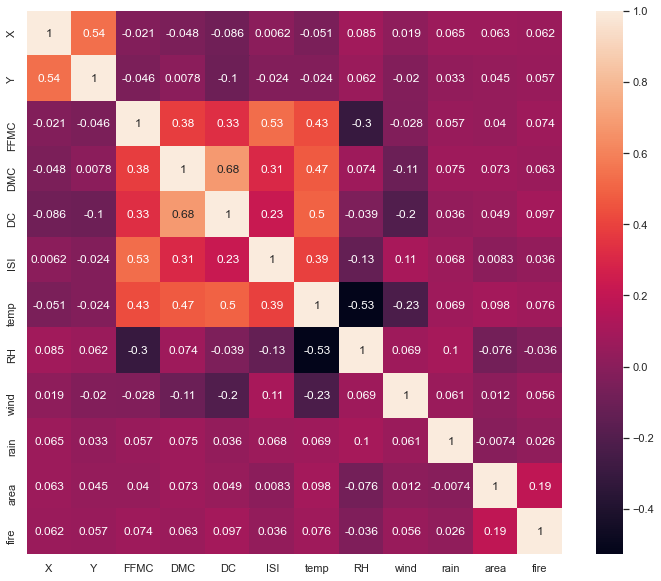

In [13]:
# correlation tres faible des features avec la variable cible corr entre (0,1) n arrive meme pas a 0.5 pour commencer a parler de relation
plt.rcParams['figure.figsize'] = [12, 10]
sns.set(font_scale = 1)
sns.heatmap(dataset.corr(), annot = True)

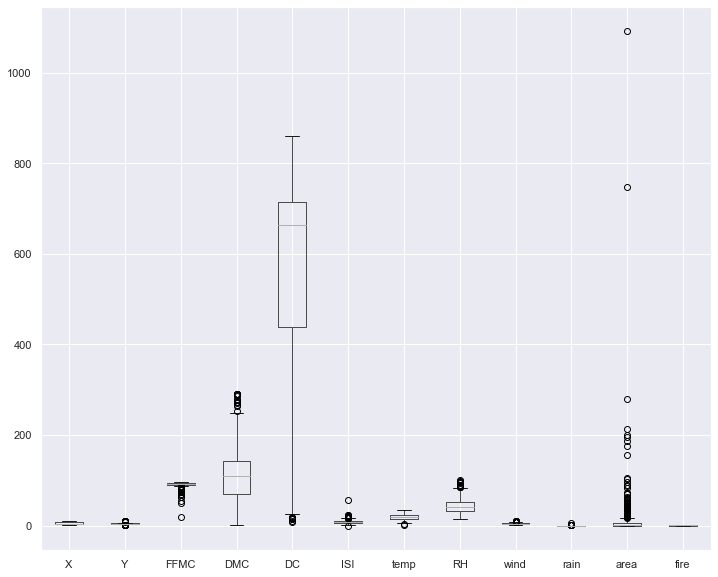

In [14]:
dataset.boxplot()

In [15]:
df = pd.read_csv("forestfires.csv")

In [16]:
# encodage mois et jours
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [17]:
# regression de le sense des moindre carre meilleur model(le plus optimise)
import statsmodels.api as sm

In [18]:
X = sm.add_constant(df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']])
model = sm.OLS(df.area,X)
result = model.fit()
result.summary()
#r2 et r2 ajuster montre que les features n explique pas la variable cible comme on l a constate avec la correlation

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   area   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.033
Date:                Mon, 14 Aug 2023   Prob (F-statistic):              0.410
Time:                        02:07:50   Log-Likelihood:                -2876.3
No. Observations:                 517   AIC:                             5771.
Df Residuals:                     508   BIC:                             5809.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4938     62.048      0.040      0.968    -119.409     124.396
FFMC          -0.0233      0.661     -0.035      0.972      -1.322       1.275
DMC            0.0765      0.067      1.145      0.253      -0.055       0.208
DC            -0.0057      0.016     -0.349      0.727      -0.038       0.026
ISI           -0.6984      0.772     -0.905      0.366      -2.215       0.818
temp           0.8480      0.787      1.077      0.282      -0.699       2.394
RH            -0.1963      0.237     -0.829      0.407      -0.661       0.269
wind           1.5271      1.670      0.914      0.361      -1.754       4.808
rain          -2.5400      9.676     -0.263      0.793     -21.549      16.469
==============================================================================
Omnibus:                      978.059   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           792201.920
Skew:                          12.652   Prob(JB):                         0.00
Kurtosis:                     193.092   Cond. No.                     1.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [20]:
df.drop(columns = ["X","Y"],inplace = True)

In [21]:
dataset = df.values


X = dataset[:,0:10]
Y = dataset[:,10]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 5)

In [23]:
models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

In [24]:
results = []
names = []
scoring = []

In [25]:
for name, model in models :
    score = cross_val_score(model, x_train, y_train, cv = 4, scoring="neg_mean_squared_error").mean()
    msg = "%s => RMSE : %f" % (name, np.sqrt(np.mean(np.absolute(score))))
    print(msg)

LiR => RMSE : 47.347465
Ridge => RMSE : 47.336705
Lasso => RMSE : 47.135950
ElasticNet => RMSE : 47.139496
Bag_Re => RMSE : 52.704552
RandomForest => RMSE : 53.114935
ExtraTreesRegressor => RMSE : 54.082797
KNN => RMSE : 52.262095
CART => RMSE : 74.872247
SVM => RMSE : 48.000044
